In [1]:
import pandas as pd
from openai import OpenAI
import time


# Client-Setup
client = OpenAI(
    api_key="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",  # <- Ersetze durch deinen echten API-Schlüssel
    base_url="https://openrouter.ai/api/v1"
)

# 📋 Modelle definieren
MODELS = {
    "gpt-4": "openai/gpt-4",
    "claude-3-opus": "anthropic/claude-3-opus",
    "llama-3-70b": "meta-llama/llama-3.3-70b-instruct",
    
}

# Funktion zum Anfordern der Antwort von einem Modell
def run_prompt(model, prompt):
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7,
        max_tokens=512  # Begrenze die Antwortlänge auf 512 Tokens
    )
    return response.choices[0].message.content

# Produktbeschreibung aus der Gruppe erzeugen
def create_product_description(group):
    lines = []
    for _, row in group.iterrows():
        line = f"{row['PropertyDefinition']}: {row['PropertyValue']}"
        if pd.notnull(row['UnitName']):
            line += f" {row['UnitName']}"
        lines.append(line)
    return "\n".join(lines)

# Prompt vorbereiten
def generate_prompt_from_group(group):
    product_text = create_product_description(group)
    # Vermeide zu langen Text, indem wir das Prompt gezielt fokussieren
    return f"""
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


{product_text}
"""

# 🚀 Main-Skript
def main():
    # 🔄 Datei laden
    df = pd.read_parquet("/Users/ilyas/Desktop/FHNW/4. Semester/Challenge/241212_processedproperties_fhnw.parquet")  # Passe Dateinamen an
    grouped = df.groupby("ProductId")

    results = []

    for product_id, group in list(grouped)[:100]:  # Nur erste 5 Produkte
        prompt = generate_prompt_from_group(group)
        row_result = {"ProductId": product_id, "Prompt": prompt}

        for name, model_id in MODELS.items():
            try:
                print(f"⏳ Anfrage an {name} für Produkt {product_id}...")
                output = run_prompt(model_id, prompt)
                # Speichern des Modells und des Outputs
                row_result[f"output_{name}"] = output
                row_result[f"model_{name}"] = name  # Modellname explizit speichern
                time.sleep(1.5)  # Vermeidung von Rate Limits
            except Exception as e:
                row_result[f"output_{name}"] = f"Fehler: {str(e)}"
                row_result[f"model_{name}"] = name  # Auch hier den Modellnamen speichern

        results.append(row_result)

    # 💾 Speichern
    pd.DataFrame(results).to_csv("produkt_zusammenfassung_frage2.csv", index=False)
    print("✅ Ergebnisse gespeichert unter 'produkt_zusammenfassung_frage2.csv'.")

# Ausführen des Skripts
if __name__ == "__main__":
    main()


⏳ Anfrage an gpt-4 für Produkt 200440...
⏳ Anfrage an claude-3-opus für Produkt 200440...
⏳ Anfrage an llama-3-70b für Produkt 200440...
⏳ Anfrage an gpt-4 für Produkt 203240...
⏳ Anfrage an claude-3-opus für Produkt 203240...
⏳ Anfrage an llama-3-70b für Produkt 203240...
⏳ Anfrage an gpt-4 für Produkt 204460...
⏳ Anfrage an claude-3-opus für Produkt 204460...
⏳ Anfrage an llama-3-70b für Produkt 204460...
⏳ Anfrage an gpt-4 für Produkt 207900...
⏳ Anfrage an claude-3-opus für Produkt 207900...
⏳ Anfrage an llama-3-70b für Produkt 207900...
⏳ Anfrage an gpt-4 für Produkt 213020...
⏳ Anfrage an claude-3-opus für Produkt 213020...
⏳ Anfrage an llama-3-70b für Produkt 213020...
⏳ Anfrage an gpt-4 für Produkt 217400...
⏳ Anfrage an claude-3-opus für Produkt 217400...
⏳ Anfrage an llama-3-70b für Produkt 217400...
⏳ Anfrage an gpt-4 für Produkt 217880...
⏳ Anfrage an claude-3-opus für Produkt 217880...
⏳ Anfrage an llama-3-70b für Produkt 217880...
⏳ Anfrage an gpt-4 für Produkt 217920...


In [14]:
from rouge_score import rouge_scorer

# Referenztext
reference = """
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


Anschluss A: 1x Cinch
Anschluss B: 1x Cinch
Anwendungsbereich: Consumer / Hi-Fi
Art: Kabel
Audio Kabeltyp: Cinch
Datenübertragung: Digital
Genaue Materialbezeichnung: Kupfer
Innenleiter Material: Kupfer
Kabel Anwendung: Digital-audio
Kabel Bauform: sauerstofffreies Kupfer
Kabel Verbindung: Anschluss (M/M)
Kabelfarbe: Blau
Länge: 3 Meter (m) Meter
Menge pro Packung: 1 Stück (Stk.) Stück
Steckerform: Vergoldete Kontakte
Steckerform: Gerade
Tiefe: 3 Meter (m) Meter
"""

# Modellantworten
gpt4_output = "Das Produkt ist ein 3 Meter langes, blaues Cinch-Audiokabel für den Consumer / Hi-Fi Bereich. Es besteht aus sauerstofffreiem Kupfer und hat vergoldete Kontakte für eine optimale digitale Datenübertragung. Im Lieferumfang ist ein Stück enthalten."
claude3_output = "Hochwertiges digitales Cinch-Audiokabel mit vergoldeten Kontakten für erstklassige Signalübertragung. Gefertigt aus sauerstofffreiem Kupfer für minimale Interferenzen und Signalverluste. 3 Meter Länge für flexible Anwendungsmöglichkeiten in Hi-Fi-Systemen."

# Scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Funktion zum runden und anzeigen
def print_rounded_scores(name, scores):
    print(f"\n{name} ROUGE Scores:")
    for metric, score in scores.items():
        print(f"{metric}: P={score.precision:.2f}, R={score.recall:.2f}, F1={score.fmeasure:.2f}")

# Ausgabe
print_rounded_scores("GPT-4", scorer.score(reference, gpt4_output))
print_rounded_scores("Claude-3", scorer.score(reference, claude3_output))

produkt_1_scores = {
    "Produkt": "Produkt_1",
    "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
    "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
    "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
    "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
    "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2),
    "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
}




GPT-4 ROUGE Scores:
rouge1: P=0.40, R=0.17, F1=0.24
rouge2: P=0.15, R=0.06, F1=0.09
rougeL: P=0.28, R=0.12, F1=0.16

Claude-3 ROUGE Scores:
rouge1: P=0.31, R=0.12, F1=0.17
rouge2: P=0.09, R=0.03, F1=0.05
rougeL: P=0.14, R=0.05, F1=0.08


In [15]:
from rouge_score import rouge_scorer

# Referenztext
reference = """
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


Artikel pro Verkaufseinheit: 2 Stück (Stk.) Stück
Druckerserie: DesignJet
Druckfarbe: Magenta
Druckfarbe: Cyan
Farbbezeichnung: C
Farbbezeichnung: M
Herstellerengagement: SBTi
Herstellerengagement: RE100
Inhalt: 130 Milliliter (ml) Milliliter
Kompatibel zu OEM: C9383A
Kompatible Druckermodelle: T1100
Kompatible Druckermodelle: T1100PS
Kompatible Druckermodelle: T1200
Passende Druckermarke: HP
Patronenart: Originalprodukt
Patronengrösse: Normal
Patronentyp: Druckkopf
Ursprungsland: Singapur
"""

# Modellantworten
gpt4_output = "Dieses Originalprodukt, bestehend aus 2 Stück Druckköpfen mit jeweils 130 Millilitern Magenta und Cyan, ist kompatibel mit den HP DesignJet Druckermodellen T1100, T1100PS und T1200. Hergestellt in Singapur, entspricht das Produkt den Herstellerengagements SBTi und RE100. Es handelt sich um ein Originalprodukt mit normaler Patronengröße."
claude3_output = "Das HP 72 Druckkopf-Set enthält je eine Cyan- und Magenta-Patrone mit je 130 ml Inhalt für HP DesignJet T1100, T1100PS und T1200 Drucker. Als Originalprodukt garantiert es höchste Druckqualität und ist Teil des Herstellerengagements für Nachhaltigkeit (SBTi, RE100)."

# Scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Funktion zum runden und anzeigen
def print_rounded_scores(name, scores):
    print(f"\n{name} ROUGE Scores:")
    for metric, score in scores.items():
        print(f"{metric}: P={score.precision:.2f}, R={score.recall:.2f}, F1={score.fmeasure:.2f}")

# Ausgabe
print_rounded_scores("GPT-4", scorer.score(reference, gpt4_output))
print_rounded_scores("Claude-3", scorer.score(reference, claude3_output))

produkt_2_scores = {
    "Produkt": "Produkt_2",
    "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
    "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
    "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
    "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
    "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2),
    "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
}




GPT-4 ROUGE Scores:
rouge1: P=0.48, R=0.28, F1=0.35
rouge2: P=0.06, R=0.04, F1=0.05
rougeL: P=0.23, R=0.13, F1=0.17

Claude-3 ROUGE Scores:
rouge1: P=0.38, R=0.21, F1=0.27
rouge2: P=0.00, R=0.00, F1=0.00
rougeL: P=0.20, R=0.11, F1=0.14


In [16]:
from rouge_score import rouge_scorer

# Referenztext
reference = """
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


American Wire Gauge (AWG): 26
Anschluss A: RJ45
Anschluss B: RJ45
Artikel pro Verkaufseinheit: 1 Stück (Stück) Stück
Breite: 150 Millimeter (mm) Millimeter
Genaue Materialbezeichnung: Polyvinylchlorid (PVC)
Gewicht: 83.5 Gramm (g) Gramm
Impedanz: 100 Ohm
Kabel Anwendung: Netzwerk
Kabel Bauform: 100 Ohm
Kabel Kategorie: CAT6
Kabel Verbindung: Anschluss (M/M)
Kabelfarbe: Blau
Kontaktbelegung: ungekreuzt (straight)
Lieferumfang: 1
Länge: 2 Meter (m) Meter
Material Isolation: Polyvinylchlorid
Patchkabel Merkmale: Halogenfrei
Patchkabeltyp: Kupferkabel
Schirmung: S/FTP
Steckerform: Vergoldete Kontakte
Ursprungsland: China
"""

# Modellantworten
gpt4_output = "Dieses 2 Meter lange, blaue Netzwerkkabel vom Typ CAT6 und 100 Ohm Impedanz hat auf beiden Seiten vergoldete RJ45-Stecker und ist gemäß American Wire Gauge (AWG) 26 gefertigt. Es ist aus Polyvinylchlorid (PVC) gemacht und hat eine S/FTP Schirmung, was für hohe Übertragungsqualität sorgt. Mit seinem Gewicht von 83,5 Gramm ist es leicht und einfach zu handhaben."
claude3_output = "Das CAT6 S/FTP Patchkabel mit vergoldeten RJ45-Anschlüssen eignet sich ideal für den Netzwerkaufbau. Mit einer Länge von 2 Metern und der hochwertigen Schirmung garantiert es eine zuverlässige und schnelle Datenübertragung. Das halogenfreie Kabel ist robust, flexibel und einfach zu verlegen."

# Scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Funktion zum runden und anzeigen
def print_rounded_scores(name, scores):
    print(f"\n{name} ROUGE Scores:")
    for metric, score in scores.items():
        print(f"{metric}: P={score.precision:.2f}, R={score.recall:.2f}, F1={score.fmeasure:.2f}")

# Ausgabe
print_rounded_scores("GPT-4", scorer.score(reference, gpt4_output))
print_rounded_scores("Claude-3", scorer.score(reference, claude3_output))

produkt_3_scores = {
    "Produkt": "Produkt_3",
    "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
    "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
    "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
    "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
    "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2),
    "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
}




GPT-4 ROUGE Scores:
rouge1: P=0.40, R=0.22, F1=0.29
rouge2: P=0.16, R=0.09, F1=0.12
rougeL: P=0.21, R=0.12, F1=0.15

Claude-3 ROUGE Scores:
rouge1: P=0.30, R=0.12, F1=0.18
rouge2: P=0.04, R=0.02, F1=0.03
rougeL: P=0.15, R=0.06, F1=0.09


In [17]:
from rouge_score import rouge_scorer

# Referenztext
reference = """
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


Antriebsart: Riemenantrieb
Audio-Anschlüsse: Cinch S/PDIF (1x)
Breite: 360 Millimeter (mm) Millimeter
Drehzahl: 45 Rpm
Drehzahl: 33 Rpm
Energieversorgung: Netzbetrieb
Ersatznadeltyp: DSN-82
Farbgruppe: Silber
Genaue Farbbezeichnung: Silber
Genaue Materialbezeichnung: Kunststoff
Gewicht: 2.7 Kilogramm (kg) Kilogramm
Höhe: 97 Millimeter (mm) Millimeter
Lieferumfang: Handbuch
Materialgruppe: Kunststoff
Plattenspieler Ausstattung: Vorverstärker
Plattenspieler Betriebsart: Vollautomatisch
Tiefe: 357 Millimeter (mm) Millimeter
Tonabnehmer: Moving Magnet
Tonarm: Gerade
"""

# Modellantworten
gpt4_output = "Dieser vollautomatische Plattenspieler in Silber ist aus Kunststoff gefertigt und mit einem Riemenantrieb, einem Vorverstärker und einem geraden Tonarm ausgestattet. Er bietet einen Cinch S/PDIF Audio-Anschluss und unterstützt sowohl 33 als auch 45 RPM Drehzahl. Mit Abmessungen von 360mm x 97mm x 357mm und einem Gewicht von 2,7kg ist er kompakt und leicht."
claude3_output = "Der vollautomatische Plattenspieler mit Riemenantrieb und geradem Tonarm bietet dank integriertem Vorverstärker und Cinch-Anschluss eine einfache Verbindung mit Ihrer Stereoanlage. Das Modell aus silbernem Kunststoff überzeugt durch präzise Wiedergabe mit 33 und 45 Umdrehungen pro Minute. Mit einem Gewicht von nur 2,7 kg und kompakten Abmessungen fügt sich der Plattenspieler problemlos in jedes Wohnambiente ein."

# Scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Funktion zum runden und anzeigen
def print_rounded_scores(name, scores):
    print(f"\n{name} ROUGE Scores:")
    for metric, score in scores.items():
        print(f"{metric}: P={score.precision:.2f}, R={score.recall:.2f}, F1={score.fmeasure:.2f}")

# Ausgabe
print_rounded_scores("GPT-4", scorer.score(reference, gpt4_output))
print_rounded_scores("Claude-3", scorer.score(reference, claude3_output))

produkt_4_scores = {
    "Produkt": "Produkt_4",
    "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
    "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
    "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
    "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
    "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2),
    "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
}




GPT-4 ROUGE Scores:
rouge1: P=0.38, R=0.23, F1=0.29
rouge2: P=0.09, R=0.05, F1=0.07
rougeL: P=0.19, R=0.12, F1=0.14

Claude-3 ROUGE Scores:
rouge1: P=0.35, R=0.22, F1=0.27
rouge2: P=0.03, R=0.02, F1=0.03
rougeL: P=0.15, R=0.09, F1=0.12


In [19]:
from rouge_score import rouge_scorer

# Referenztext
reference = """
Fasse das folgende Produkt in einem kurzen, prägnanten Text von maximal 3 Sätzen zusammen. Konzentriere dich auf die wichtigsten Merkmale und Vorteile, ohne unnötige Ausschmückungen.


Artikel pro Verkaufseinheit: 1 Stück (Stk.) Stück
Breite: 22 Zentimeter (cm) Zentimeter
Druckerserie: C
Druckfarbe: Schwarz
Druckleistung bei 5% Deckung: 20000 Anzahl (x) Anzahl
Farbbezeichnung: BK
Gewicht: 1400 Gramm (g) Gramm
Herstellerengagement: SBTi
Höhe: 38 Zentimeter (cm) Zentimeter
Kompatible Druckermodelle: C5750
Kompatible Druckermodelle: C5650
Passende Druckermarke: OKI
Patronenart: Originalprodukt
Tiefe: 15 Zentimeter (cm) Zentimeter
Tonergrösse: Normal
Tonertyp: Trommeleinheit
Ursprungsland: Japan
"""

# Modellantworten
gpt4_output = "Dieses Originalprodukt aus Japan ist eine Trommeleinheit des Herstellers OKI für die Druckerserien C5750 und C5650. Die schwarze Druckfarbe mit einer Druckleistung von 20.000 Seiten bei 5% Deckung bietet eine normale Tonergröße. Das Produkt ist 22 cm breit, 38 cm hoch, 15 cm tief und wiegt 1400 Gramm."
claude3_output = "Die Trommeleinheit für OKI C5650 und C5750 Drucker bietet eine Druckleistung von 20.000 Seiten bei 5% Deckung. Das Originalprodukt aus Japan überzeugt mit kompakten Abmessungen von 22 x 38 x 15 cm und einem Gewicht von 1400 g. OKI engagiert sich im Rahmen der SBTi für Nachhaltigkeit."

# Scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Funktion zum runden und anzeigen
def print_rounded_scores(name, scores):
    print(f"\n{name} ROUGE Scores:")
    for metric, score in scores.items():
        print(f"{metric}: P={score.precision:.2f}, R={score.recall:.2f}, F1={score.fmeasure:.2f}")

# Ausgabe
print_rounded_scores("GPT-4", scorer.score(reference, gpt4_output))
print_rounded_scores("Claude-3", scorer.score(reference, claude3_output))

produkt_5_scores = {
    "Produkt": "Produkt_5",
    "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
    "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
    "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
    "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
    "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2),
    "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
}




GPT-4 ROUGE Scores:
rouge1: P=0.57, R=0.31, F1=0.40
rouge2: P=0.06, R=0.03, F1=0.04
rougeL: P=0.22, R=0.12, F1=0.15

Claude-3 ROUGE Scores:
rouge1: P=0.48, R=0.26, F1=0.34
rouge2: P=0.04, R=0.02, F1=0.03
rougeL: P=0.22, R=0.12, F1=0.15


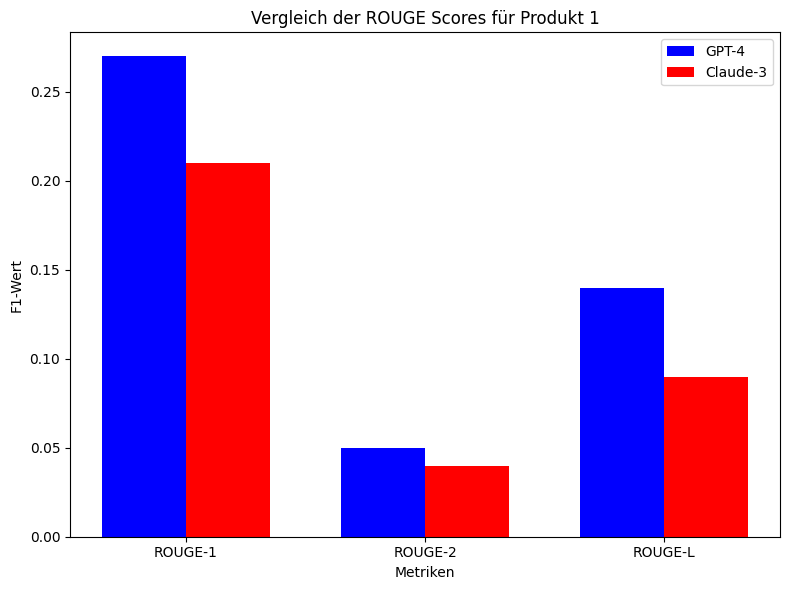

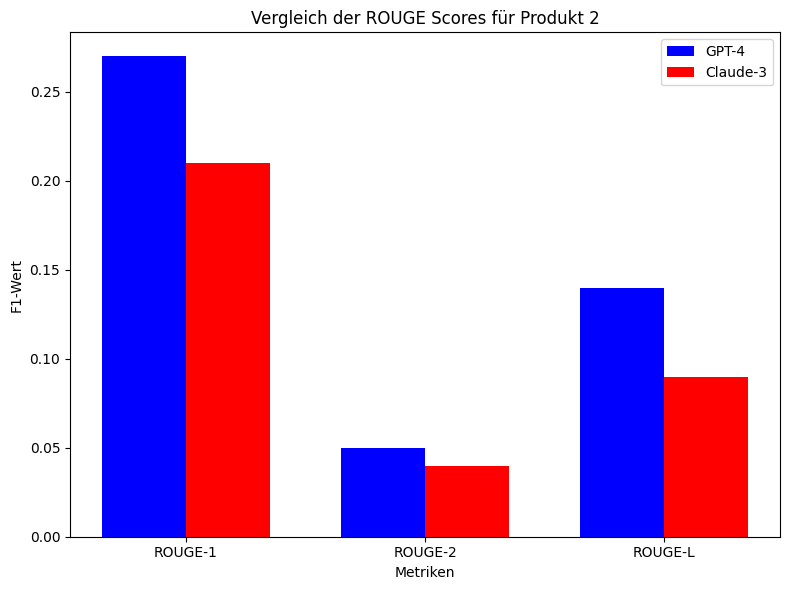

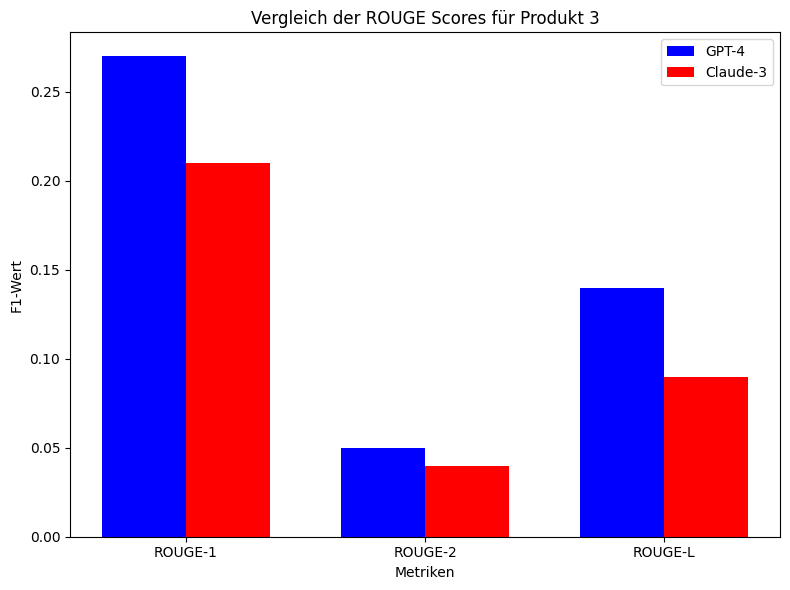

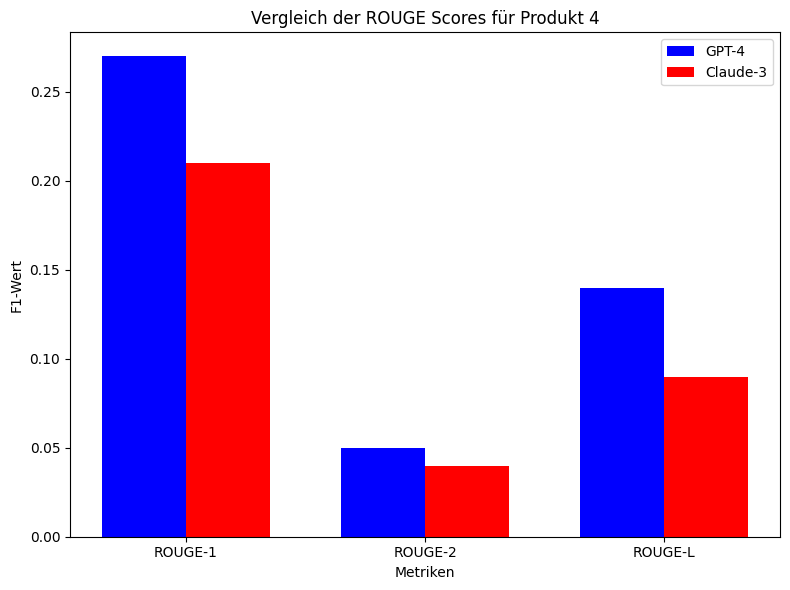

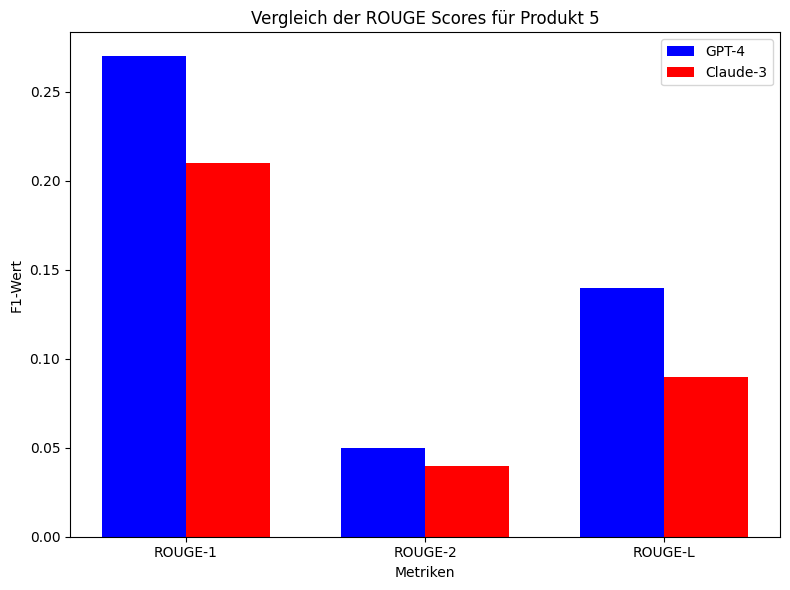

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Beispiel: Deine Produkt-Scores (füge die restlichen Produkt-Scores ein)
all_scores = [produkt_1_scores, produkt_2_scores, produkt_3_scores, produkt_4_scores, produkt_5_scores]

# Funktion zum Plotten eines Produkts
def plot_product_scores(product_scores, product_name):
    # Extrahiere die Scores für dieses Produkt
    rouge1_gpt = product_scores["GPT-4_rouge1_f1"]
    rouge1_claude = product_scores["Claude3_rouge1_f1"]

    rouge2_gpt = product_scores["GPT-4_rouge2_f1"]
    rouge2_claude = product_scores["Claude3_rouge2_f1"]

    rougeL_gpt = product_scores["GPT-4_rougeL_f1"]
    rougeL_claude = product_scores["Claude3_rougeL_f1"]

    # X-Achse
    x = np.arange(3)  # Es gibt 3 Metriken: rouge1, rouge2, rougeL
    bar_width = 0.35  # Breite der Balken

    # Erstelle das Plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Balken nebeneinander
    ax.bar(x - bar_width / 2, [rouge1_gpt, rouge2_gpt, rougeL_gpt], bar_width, label='GPT-4', color='b')
    ax.bar(x + bar_width / 2, [rouge1_claude, rouge2_claude, rougeL_claude], bar_width, label='Claude-3', color='r')

    # Achsenbeschriftungen und Titel
    ax.set_xlabel('Metriken')
    ax.set_ylabel('F1-Wert')
    ax.set_title(f'Vergleich der ROUGE Scores für {product_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'])
    ax.legend()

    # Diagramm anzeigen
    plt.tight_layout()
    plt.show()

# Für jedes Produkt ein Diagramm erstellen
for i, product_scores in enumerate(all_scores, start=1):
    product_name = f"Produkt {i}"
    plot_product_scores(product_scores, product_name)


In [10]:
    import openpyxl
    rouge_score_df = pd.read_excel("/Users/ilyas/Desktop/FHNW/4. Semester/Challenge/produkt_zusammenfassung_frage2.xlsx", header=1)  


In [11]:
rouge_score_df

,ProductId,Prompt,output_gpt-4,model_gpt-4,output_claude-3-opus,model_claude-3-opus,output_llama-3-70b,model_llama-3-70b
0,200440,"Fasse das folgende Produkt in einem kurzen, pr...","Dieses 3 Meter lange, blaue Cinch-Kabel ist id...",gpt-4,Das digitale Cinch-Audiokabel aus sauerstofffr...,claude-3-opus,Das digitale Audio-Kabel ist ein 3-Meter-Kabel...,llama-3-70b
1,203240,"Fasse das folgende Produkt in einem kurzen, pr...",Dieses Originalprodukt von HP ist ein Druckkop...,gpt-4,Das HP 72 Druckkopf-Set enthält je eine Cyan- ...,claude-3-opus,Dieses Druckkopf-Originalprodukt von HP ist in...,llama-3-70b
2,204460,"Fasse das folgende Produkt in einem kurzen, pr...","Dieses 2 Meter lange, blaue Netzwerkkabel (Kat...",gpt-4,Das CAT6 S/FTP Patchkabel mit vergoldeten RJ45...,claude-3-opus,Das 2-Meter-Patchkabel ist ein CAT6-Kupferkabe...,llama-3-70b
3,207900,"Fasse das folgende Produkt in einem kurzen, pr...",Dieser vollautomatische Plattenspieler mit Rie...,gpt-4,Der vollautomatische Plattenspieler mit Riemen...,claude-3-opus,Der Plattenspieler verfügt über einen riemenge...,llama-3-70b
4,213020,"Fasse das folgende Produkt in einem kurzen, pr...",Das Produkt ist eine original Trommeleinheit a...,gpt-4,Die Trommeleinheit für OKI C5750 und C5650 Dru...,claude-3-opus,Dieses OKI-Originalprodukt ist eine Trommelein...,llama-3-70b
...,...,...,...,...,...,...,...,...
95,640340,"Fasse das folgende Produkt in einem kurzen, pr...","Dieser leistungsstarke, 170 Watt starke Alless...",gpt-4,Die Allesschneidemaschine aus hochwertigem Ede...,claude-3-opus,"Das Produkt ist ein silberner, 170-Watt-Heizer...",llama-3-70b
96,714480,"Fasse das folgende Produkt in einem kurzen, pr...","Das ""Eau d'orange verte"" ist ein Herren Eau de...",gpt-4,"Das Eau de Cologne ""Eau d'orange verte"" für He...",claude-3-opus,"Das Eau de Cologne ""Eau d'orange verte"" ist ei...",llama-3-70b
97,722560,"Fasse das folgende Produkt in einem kurzen, pr...",Dieses Produkt ist eine Vollversion eines 64-b...,gpt-4,Windows 11 Home ist die ideale Wahl für Einzel...,claude-3-opus,Das Produkt ist eine Vollversion eines 64-bit-...,llama-3-70b
98,759480,"Fasse das folgende Produkt in einem kurzen, pr...",Diese hochwertige Küchenmaschine in Weiß/Silbe...,gpt-4,Die Küchenmaschine verfügt über eine Leistung ...,claude-3-opus,Diese Küchenmaschine bietet eine Vielzahl von ...,llama-3-70b


In [12]:
from rouge_score import rouge_scorer
import pandas as pd

# ROUGE-Scorer initialisieren
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Leere Listen für Ergebnisse
gpt4_scores_list = []
claude3_scores_list = []
llama3_scores_list = []

# Iteriere über jede Zeile im DataFrame
for index, row in rouge_score_df.iterrows():
    reference = row["Prompt"]
    
    gpt4_output = row["output_gpt-4"]
    claude3_output = row["output_claude-3-opus"]
    llama3_output = row["output_llama-3-70b"]

    # Berechne ROUGE-Scores
    gpt4_scores = scorer.score(reference, gpt4_output)
    claude3_scores = scorer.score(reference, claude3_output)
    llama3_scores = scorer.score(reference, llama3_output)

    # Füge F1-Scores zur Liste hinzu
    gpt4_scores_list.append({
        "GPT-4_rouge1_f1": round(gpt4_scores['rouge1'].fmeasure, 2),
        "GPT-4_rouge2_f1": round(gpt4_scores['rouge2'].fmeasure, 2),
        "GPT-4_rougeL_f1": round(gpt4_scores['rougeL'].fmeasure, 2)
    })

    claude3_scores_list.append({
        "Claude3_rouge1_f1": round(claude3_scores['rouge1'].fmeasure, 2),
        "Claude3_rouge2_f1": round(claude3_scores['rouge2'].fmeasure, 2),
        "Claude3_rougeL_f1": round(claude3_scores['rougeL'].fmeasure, 2)
    })

    llama3_scores_list.append({
        "LLaMA3_rouge1_f1": round(llama3_scores['rouge1'].fmeasure, 2),
        "LLaMA3_rouge2_f1": round(llama3_scores['rouge2'].fmeasure, 2),
        "LLaMA3_rougeL_f1": round(llama3_scores['rougeL'].fmeasure, 2)
    })

# Füge die Ergebnisse dem DataFrame hinzu
rouge_score_df = pd.concat([
    rouge_score_df,
    pd.DataFrame(gpt4_scores_list),
    pd.DataFrame(claude3_scores_list),
    pd.DataFrame(llama3_scores_list)
], axis=1)

# ✅ Optional: Ergebnisse speichern
rouge_score_df.to_csv("rouge_scores_ausgewertet.csv", index=False)


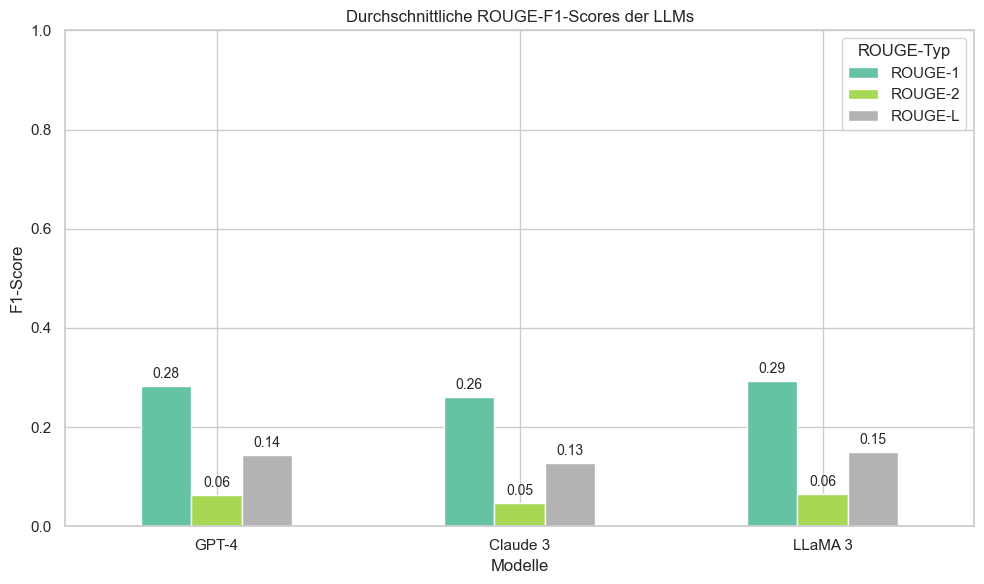

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen
rouge_scores_ausgewertet = pd.read_csv("/Users/ilyas/Desktop/FHNW/4. Semester/Challenge/rouge_scores_ausgewertet.csv")

# Mittelwerte berechnen
average_scores = {
    "ROUGE-1": [
        rouge_scores_ausgewertet["GPT-4_rouge1_f1"].mean(),
        rouge_scores_ausgewertet["Claude3_rouge1_f1"].mean(),
        rouge_scores_ausgewertet["LLaMA3_rouge1_f1"].mean()
    ],
    "ROUGE-2": [
        rouge_scores_ausgewertet["GPT-4_rouge2_f1"].mean(),
        rouge_scores_ausgewertet["Claude3_rouge2_f1"].mean(),
        rouge_scores_ausgewertet["LLaMA3_rouge2_f1"].mean()
    ],
    "ROUGE-L": [
        rouge_scores_ausgewertet["GPT-4_rougeL_f1"].mean(),
        rouge_scores_ausgewertet["Claude3_rougeL_f1"].mean(),
        rouge_scores_ausgewertet["LLaMA3_rougeL_f1"].mean()
    ]
}

# In DataFrame umwandeln
scores_df = pd.DataFrame(average_scores, index=["GPT-4", "Claude 3", "LLaMA 3"])

# Plot-Stil
sns.set(style="whitegrid")
ax = scores_df.plot(kind="bar", figsize=(10, 6), rot=0, colormap="Set2")

# Titel & Achsenbeschriftung
plt.title("Durchschnittliche ROUGE-F1-Scores der LLMs")
plt.ylabel("F1-Score")
plt.xlabel("Modelle")
plt.ylim(0, 1)
plt.legend(title="ROUGE-Typ")

# Werte auf den Balken anzeigen
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,  # leicht über dem Balken
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
from bert_score import score

bert_score_df = pd.read_excel("/Users/ilyas/Desktop/FHNW/4. Semester/Challenge/produkt_zusammenfassung_frage2.xlsx", header=1)  

# Listen zur Speicherung der Ergebnisse
gpt4_scores_list = []
claude3_scores_list = []
llama3_scores_list = []

# Iteration über jede Zeile im DataFrame
for index, row in bert_score_df.iterrows():
    reference = row["Prompt"]

    gpt4_output = row["output_gpt-4"]
    claude3_output = row["output_claude-3-opus"]
    llama3_output = row["output_llama-3-70b"]

    # GPT-4 BERTScore
    P, R, F1 = score([gpt4_output], [reference], lang="de", verbose=False)
    gpt4_scores_list.append({
        "GPT-4_bert_precision": round(P[0].item(), 3),
        "GPT-4_bert_recall": round(R[0].item(), 3),
        "GPT-4_bert_f1": round(F1[0].item(), 3)
    })

    # Claude 3 BERTScore
    P, R, F1 = score([claude3_output], [reference], lang="de", verbose=False)
    claude3_scores_list.append({
        "Claude3_bert_precision": round(P[0].item(), 3),
        "Claude3_bert_recall": round(R[0].item(), 3),
        "Claude3_bert_f1": round(F1[0].item(), 3)
    })

    # LLaMA 3 BERTScore
    P, R, F1 = score([llama3_output], [reference], lang="de", verbose=False)
    llama3_scores_list.append({
        "LLaMA3_bert_precision": round(P[0].item(), 3),
        "LLaMA3_bert_recall": round(R[0].item(), 3),
        "LLaMA3_bert_f1": round(F1[0].item(), 3)
    })

# Zusammenfügen der Scores zum Haupt-DataFrame
bert_score_df = pd.concat([
    bert_score_df,
    pd.DataFrame(gpt4_scores_list),
    pd.DataFrame(claude3_scores_list),
    pd.DataFrame(llama3_scores_list)
], axis=1)

# ✅ Optional: Ergebnis als CSV speichern
bert_score_df.to_csv("bert_scores_ausgewertet.csv", index=False)


KeyboardInterrupt: 

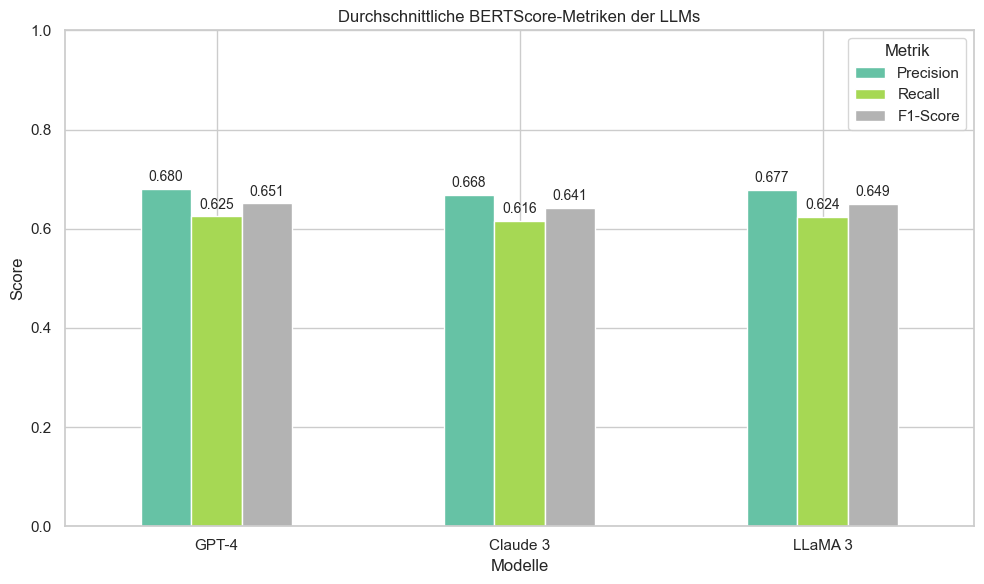

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen (mit BERTScore-Werten)
bert_scores_ausgewertet = pd.read_csv("/Users/ilyas/Desktop/FHNW/4. Semester/Challenge/bert_scores_ausgewertet.csv")

# Mittelwerte berechnen für Precision, Recall und F1
average_scores = {
    "Precision": [
        bert_scores_ausgewertet["GPT-4_bert_precision"].mean(),
        bert_scores_ausgewertet["Claude3_bert_precision"].mean(),
        bert_scores_ausgewertet["LLaMA3_bert_precision"].mean()
    ],
    "Recall": [
        bert_scores_ausgewertet["GPT-4_bert_recall"].mean(),
        bert_scores_ausgewertet["Claude3_bert_recall"].mean(),
        bert_scores_ausgewertet["LLaMA3_bert_recall"].mean()
    ],
    "F1-Score": [
        bert_scores_ausgewertet["GPT-4_bert_f1"].mean(),
        bert_scores_ausgewertet["Claude3_bert_f1"].mean(),
        bert_scores_ausgewertet["LLaMA3_bert_f1"].mean()
    ]
}

# In DataFrame umwandeln
scores_df = pd.DataFrame(average_scores, index=["GPT-4", "Claude 3", "LLaMA 3"])

# Plot-Stil
sns.set(style="whitegrid")
ax = scores_df.plot(kind="bar", figsize=(10, 6), rot=0, colormap="Set2")

# Titel & Achsenbeschriftung
plt.title("Durchschnittliche BERTScore-Metriken der LLMs")
plt.ylabel("Score")
plt.xlabel("Modelle")
plt.ylim(0, 1)
plt.legend(title="Metrik")

# Werte auf den Balken anzeigen
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.show()


Kleiner Test, ob der Unterschied klarer wird mit einem Konfidenzintervall: 

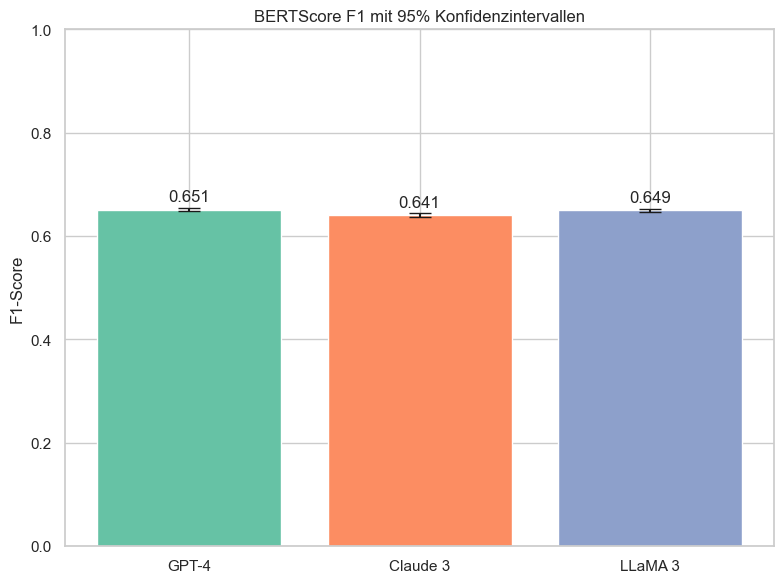

In [25]:


# Daten für BERTScore-F1 pro Modell
f1_columns = {
    "GPT-4": bert_scores_ausgewertet["GPT-4_bert_f1"],
    "Claude 3": bert_scores_ausgewertet["Claude3_bert_f1"],
    "LLaMA 3": bert_scores_ausgewertet["LLaMA3_bert_f1"]
}

# Mittelwerte und Konfidenzintervalle berechnen
f1_means = []
f1_errors = []

for model, scores in f1_columns.items():
    mean = scores.mean()
    std = scores.std()
    n = len(scores)
    ci = 1.96 * (std / np.sqrt(n))  # 95% Konfidenzintervall

    f1_means.append(mean)
    f1_errors.append(ci)

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
barplot = plt.bar(f1_columns.keys(), f1_means, yerr=f1_errors, capsize=8, color=sns.color_palette("Set2"))

# Achsentitel und Beschriftungen
plt.title("BERTScore F1 mit 95% Konfidenzintervallen")
plt.ylabel("F1-Score")
plt.ylim(0, 1)

# Werte auf den Balken anzeigen
for bar, mean in zip(barplot, f1_means):
    plt.text(bar.get_x() + bar.get_width() / 2, mean + 0.01, f"{mean:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:

# Spalten extrahieren und NaN entfernen
gpt_f1 = bert_scores_ausgewertet["GPT-4_bert_f1"].dropna()
claude_f1 = bert_scores_ausgewertet["Claude3_bert_f1"].dropna()
llama_f1 = bert_scores_ausgewertet["LLaMA3_bert_f1"].dropna()

# Gleich lange Serien für paarweisen Vergleich sicherstellen
min_len = min(len(gpt_f1), len(claude_f1), len(llama_f1))
gpt_f1 = gpt_f1[:min_len]
claude_f1 = claude_f1[:min_len]
llama_f1 = llama_f1[:min_len]

# T-Tests
t_gpt_claude, p_gpt_claude = ttest_rel(gpt_f1, claude_f1)
t_gpt_llama, p_gpt_llama = ttest_rel(gpt_f1, llama_f1)
t_claude_llama, p_claude_llama = ttest_rel(claude_f1, llama_f1)

print(f"GPT-4 vs Claude 3: t={t_gpt_claude:.4f}, p={p_gpt_claude:.6f}")
print(f"GPT-4 vs LLaMA 3: t={t_gpt_llama:.4f}, p={p_gpt_llama:.6f}")
print(f"Claude 3 vs LLaMA 3: t={t_claude_llama:.4f}, p={p_claude_llama:.6f}")

GPT-4 vs Claude 3: t=5.1913, p=0.000001
GPT-4 vs LLaMA 3: t=0.9629, p=0.337948
Claude 3 vs LLaMA 3: t=-5.0968, p=0.000002
